<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/SVMprocesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement SVM with Scikit-Learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



Importing the Dataset

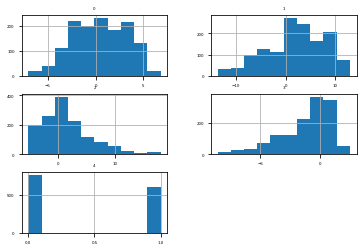

In [ ]:
dataset = pd.read_csv('drive/My Drive/Dataset/data_banknote_authentication.txt', header=None)
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the histograms
plt.show()

In [ ]:
print(dataset.shape)
print(dataset.describe)

(1372, 5)
<bound method NDFrame.describe of             0         1        2        3  4
0     3.62160   8.66610  -2.8073 -0.44699  0
1     4.54590   8.16740  -2.4586 -1.46210  0
2     3.86600  -2.63830   1.9242  0.10645  0
3     3.45660   9.52280  -4.0112 -3.59440  0
4     0.32924  -4.45520   4.5718 -0.98880  0
...       ...       ...      ...      ... ..
1367  0.40614   1.34920  -1.4501 -0.55949  1
1368 -1.38870  -4.87730   6.4774  0.34179  1
1369 -3.75030 -13.45860  17.5932 -2.77710  1
1370 -3.56370  -8.38270  12.3930 -1.28230  1
1371 -2.54190  -0.65804   2.6842  1.19520  1

[1372 rows x 5 columns]>


In [ ]:
dataset.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Data Preprocessing

In [ ]:
data = dataset.values
X, y = data[:,:-1], data[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training the alogorithm

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(C=1,kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# making Prediction

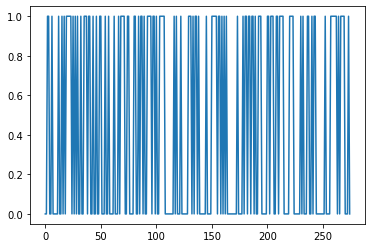

In [ ]:
y_pred = svclassifier.predict(X_test)
plt.plot(y_pred)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[154   3]
 [  1 117]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       157
         1.0       0.97      0.99      0.98       118

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



# Plot Decision Boudary of Classifier

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

X_mat = np.asmatrix(X_train[:,0:2])
y_mat = np.asmatrix(y_train)
mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50
    
x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
xx1 = np.asmatrix([xx,X_train[2:4]])
#Z = svclassifier.predict(np.c_[xx1.ravel(),yy.ravel()])

In [ ]:
print(xx.shape)
print(X_mat.shape)

(2873, 1587)
(1097, 2)


In [ ]:
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y_train, cmap=cmap_bold, edgecolor = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# SVM analysis

In [ ]:
from pandas import read_csv

dataset = read_csv('drive/My Drive/InvertPhaseLong2.csv', header=0)

               850nm          640nm  ...  Channel 7  Channel 8
count   20665.000000   20665.000000  ...    20665.0    20665.0
mean   817663.068764 -777540.398306  ...        0.0        0.0
std     26649.696060   13677.458630  ...        0.0        0.0
min         0.000000 -823380.000000  ...        0.0        0.0
25%    808706.000000 -785469.000000  ...        0.0        0.0
50%    826957.000000 -773174.000000  ...        0.0        0.0
75%    834737.000000 -767922.000000  ...        0.0        0.0
max    857234.000000 -752898.000000  ...        0.0        0.0

[8 rows x 8 columns]


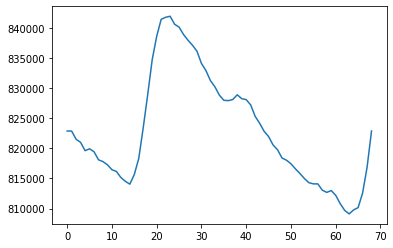

In [ ]:
from matplotlib import pyplot

print(dataset.describe())
data = dataset.values
ppg1 = data[:,0]
pyplot.plot(ppg1[1:70])
pyplot.show()

Test extract features

In [ ]:
from numpy import mean, std
import numpy as np
from scipy.stats import kurtosis, skew

x = np.random.normal(0, 2, 10000)

print(mean(x))
print(std(x))
print(skew(x))
print(kurtosis(x))
print(min(x))
print(max(x))

0.018521602951116035
1.9770646329646602
0.045455208253299885
0.03387777211976406
-7.683995471748225
7.508306472303726


In [ ]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np

def load_data(filename):
  dataset = read_csv(filename, header=0);
  data = dataset.values;
  return data
def segment_data(signal, distance, overlap):
  i = 1;
  s = list()
  while int(i+distance)<len(signal):
    a = signal[int(i):int(i+distance)];
    #a = [x for x in t]
    #a = DataFrame.transpose(DataFrame(t))
    #a = np.split(a,int(distance-1)
    s.append(a)
    i = i + distance*overlap
    
  return np.asarray(s) # return a nd array

data = load_data('drive/My Drive/InvertPhaseLong2.csv')  
ppg = segment_data(data[:,0],70,0.5)
ppg1 = segment_data(data[:,2],70,0.5)
ppg2 = segment_data(data[:,1],70,0.5)

# Prepare Data

In [ ]:
# label for first group of Data
y1 = [1]*ppg.shape[0];  #inphase output 1
y2 = [0]*ppg1.shape[0]  #inphase output 0
y1 = np.asarray(y1)
y2 = np.asarray(y2)
y1.shape, y2.shape
#ydf1 = DataFrame(y1)
#ydf2 = DataFrame(y2)
# Concatenate data
X = np.concatenate((ppg, ppg1))
y = np.concatenate((y1, y2))
print(X.shape)

# rescale data
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
def scaling(signal):
  scaler = MinMaxScaler()
  s_trans = signal.transpose()
  Xscaled = scaler.fit_transform(s_trans)
  Xscaled = Xscaled.transpose()
  return Xscaled  
# Scaling Input Data 
Xscaled = scaling(X)
Xscaled2 = scaling(ppg2)

(1178, 70)


# Extract features

In [ ]:

def feature_extraction(data):
  feats = list()
  for x in data:
     Smax = max(x)
     Smin = min(x)
     Smean = mean(x)
     Sstd = std(x)
     Sskew = skew(x)
     Skur = kurtosis(x)
     feat = [Smax, Smin, Smean, Sstd, Sskew, Skur]
     feats.append(feat)
  return feats


In [ ]:
Xfeats = np.asarray(feature_extraction(Xscaled))

Xfeats[1:10],Xfeats[1000:1010]

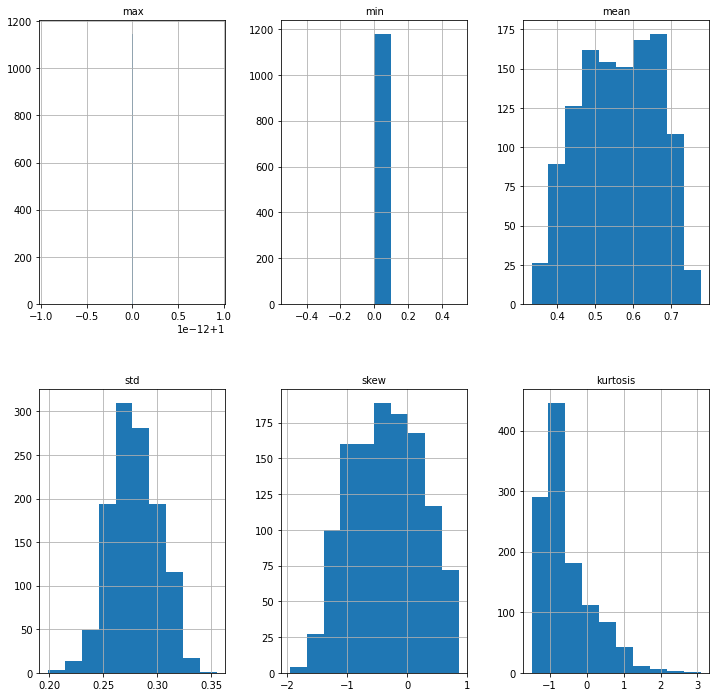

,max,min,mean,std,skew,kurtosis
count,1.178000e+03,1178.0,1178.000000,1178.000000,1178.000000,1178.000000
mean,1.000000e+00,0.0,0.561396,0.278874,-0.349056,-0.559928
std,9.291160e-16,0.0,0.099584,0.022379,0.588377,0.684774
min,1.000000e+00,0.0,0.332811,0.198585,-1.960548,-1.492377
25%,1.000000e+00,0.0,0.481437,0.263498,-0.822758,-1.031637
50%,1.000000e+00,0.0,0.565767,0.277893,-0.347247,-0.781377
75%,1.000000e+00,0.0,0.644792,0.295246,0.110448,-0.276269
max,1.000000e+00,0.0,0.776932,0.355401,0.864645,3.084405


In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt

#plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
featnames = ["max", "min","mean","std","skew","kurtosis"]
# show historgram of features
featset = DataFrame(Xfeats, columns= featnames)
#plt.figure(figsize=(18, 18))
fig = featset.hist(xlabelsize=10, ylabelsize=10,figsize=[12,12],layout=[2,3],)
[x.title.set_size(10) for x in fig.ravel()]

# show the histograms
#plt.suptitle("This is Figure title")
plt.show()
featset.describe()



# Data Processing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xfeats, y, test_size=0.4, random_state=1)

Train Data

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(C=1,kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Confuse matrix

[[222  12]
 [ 25 213]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       234
           1       0.95      0.89      0.92       238

    accuracy                           0.92       472
   macro avg       0.92      0.92      0.92       472
weighted avg       0.92      0.92      0.92       472



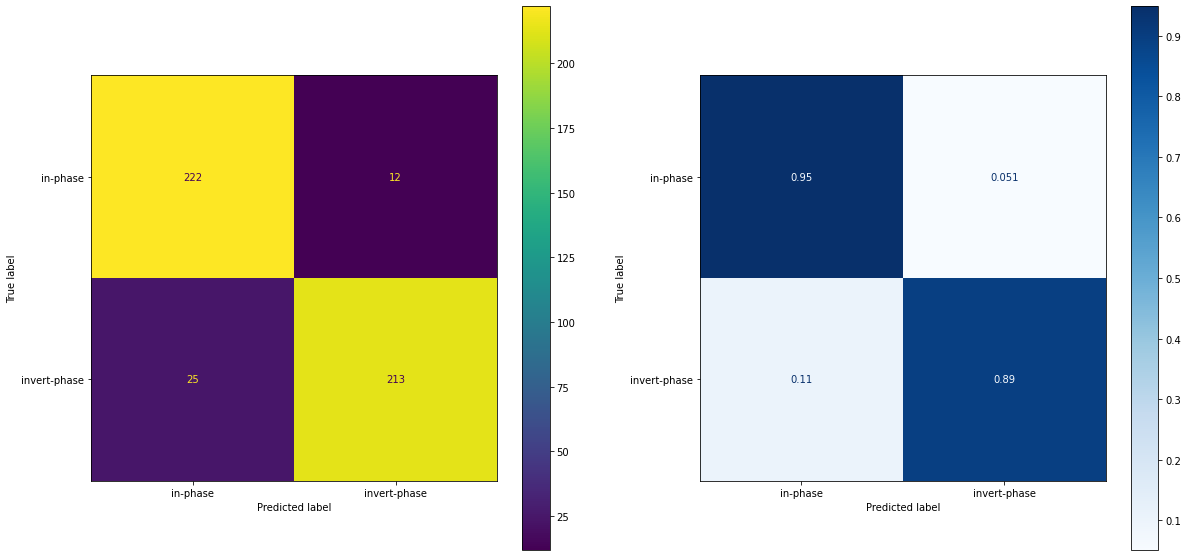

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
# making prediction
y_pred = svclassifier.predict(X_test)

# confuse matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
# plot confuse matrix
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
#_, ax = plt.subplots(figsize=(10, 10))
class_names = ["in-phase", "invert-phase"]
plot_confusion_matrix(svclassifier, X_test, y_test,display_labels=class_names, values_format='d' ,
                                            ax=ax1)
#_, bx = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(svclassifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true', values_format='.2g',ax=ax2)
#plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.show()